In [1]:
import random as rd
import numpy as np
from scipy.special import comb
from scipy.stats import mode,poisson
import matplotlib.pyplot as plt

In [2]:
mdeck_index = list(range(0,52))
mdeck = ["2h","3h","4h","5h","6h","7h","8h","9h","10h","jh","qh","kh","ah","2d","3d","4d","5d","6d","7d","8d","9d","10d","jd","qd","kd","ad","2s","3s","4s","5s","6s","7s","8s","9s","10s","js","qs","ks","as","2c","3c","4c","5c","6c","7c","8c","9c","10c","jc","qc","kc","ac"]
mdeck = np.array(mdeck)

mdeck_rank = np.array(list(range(0,13)) * 4)

def to_hand(index):
    if index == -1:
        return([])
    else:
        return(list(mdeck[index]))
    

class player():
    def __init__(self,hand):
        
        if hand == -1:
            self.hand_index = []
        else:
            self.hand_index = hand
        
        self.rank_index = mdeck_rank[self.hand_index]
        self.hand = to_hand(hand)
        self.hand_score = 0

class create_table:
    def __init__(self,flop,turn,river):
        self.flop_index = flop
        self.turn_index = turn
        self.river_index = river
        self.flop = to_hand(flop)
        self.turn = to_hand(turn)
        self.river = to_hand(river)
        
        if flop != -1:
            self.table_index = flop + turn + river
            self.table = to_hand(flop + turn + river)
        else:
            self.table_index = []
            self.table = []

def rank_check(rank0,rank1):
    
    if len(rank0) == 0:
        return 2
    
    rank_bool = rank0 < rank1
    
    if rank_bool[0] == True:
        return(1)
    elif rank_bool[0] == False and rank0[0] > rank1[0]:
            return(0)
    elif rank0[0] == rank1[0]:
        rank0 = rank0[1:len(rank0)]
        rank1 = rank1[1:len(rank1)]
        rank_check(rank0,rank1)

def high_hand():        
    hh_rank = mdeck_rank[table.table_index + player_list[0].hand_index]
    hh_rank = np.flip(np.sort(hh_rank))[0:5]
    winner = [0]

    for pindex in range(1,len(player_list)):

        hh_rank_temp = mdeck_rank[table.table_index + player_list[pindex].hand_index]
        hh_rank_temp = np.flip(np.sort(hh_rank_temp))[0:5]

        result = rank_check(hh_rank,hh_rank_temp)

        if result == 1:
            hh_rank = hh_rank_temp
            winner = [pindex]
        elif result == 2:
            winner = winner + [pindex]
            
    return(winner)

def op_check(rank_list):
    for rindex in range(0,np.size(rank_list)-1):
        
        if rank_list[rindex] == rank_list[rindex+1]:
            return(rank_list[rindex])
    
    return(-1)
    

def one_pair():
    op_rank = mdeck_rank[table.table_index + player_list[0].hand_index]
    op_rank = np.flip(np.sort(op_rank))
    op = op_check(op_rank)
    winner = [0]

    for pindex in range(1,len(player_list)):

        op_rank_temp = mdeck_rank[table.table_index + player_list[pindex].hand_index]
        op_rank_temp = np.flip(np.sort(op_rank_temp))

        op_temp = op_check(op_rank_temp)

        if op < op_temp:
            op = op_temp
            op_rank = op_rank_temp
            winner = [pindex]
        elif op == op_temp:

            kicker0 = op_rank[op_rank != op][0:3]
            kicker1 = op_rank_temp[op_rank_temp != op][0:3]

            result = rank_check(kicker0,kicker1)

            if result == 1:
                winner = [pindex]
            elif result == 2:
                winner = winner + [pindex]
    
    return(winner)

def tp_check(rank_list):
    
    first_pair = op_check(rank_list)
    second_pair = op_check(rank_list[rank_list != first_pair])
    
    if first_pair != -1 and second_pair != -1:
        return([first_pair,second_pair])
    return([-1,-1])

def two_pair():
    tp_rank = mdeck_rank[table.table_index + player_list[0].hand_index]
    tp_rank = np.flip(np.sort(tp_rank))
    
    pairs = tp_check(tp_rank)
    first_pair = pairs[0]
    second_pair = pairs[1]
    winner = [0]

    for pindex in range(1,len(player_list)):
        
        tp_rank_temp = mdeck_rank[table.table_index + player_list[pindex].hand_index]
        tp_rank_temp = np.flip(np.sort(tp_rank_temp))

        pairs_temp = tp_check(tp_rank_temp)
        first_pair_temp = pairs_temp[0]
        second_pair_temp = pairs_temp[1]

        if (first_pair < first_pair_temp and second_pair_temp != -1) or (first_pair == first_pair_temp and second_pair < second_pair_temp):
            first_pair = first_pair_temp
            second_pair = second_pair_temp
            tp_rank = tp_rank_temp
            winner = [pindex]

        elif first_pair == first_pair_temp and second_pair == second_pair_temp:

            kicker0 = tp_rank[list((tp_rank != first_pair) == (tp_rank != second_pair))][0]
            kicker1 = tp_rank_temp[list((tp_rank_temp != first_pair) == (tp_rank_temp != second_pair))][0]

            if kicker0 < kicker1:
                winner = [pindex]
            elif kicker0 == kicker1:
                winner = winner + [pindex]

    return(winner)


def trip_check(rank_list):
    for rindex in range(0,np.size(rank_list)-2):
        
        if (rank_list[rindex] == rank_list[rindex+1]) and (rank_list[rindex+1] == rank_list[rindex+2] ):
            return(rank_list[rindex])
    
    return(-1)    
    

def three_of_a_kind():
    tok_rank = mdeck_rank[table.table_index + player_list[0].hand_index]
    tok_rank  = np.flip(np.sort(tok_rank))
    tok = trip_check(tok_rank)
    winner = [0]

    for pindex in range(1,len(player_list)):
        tok_rank_temp = mdeck_rank[table.table_index + player_list[pindex].hand_index]
        tok_rank_temp = np.flip(np.sort(tok_rank_temp))

        tok_temp = trip_check(tok_rank_temp)

        if tok < tok_temp:
            tok = tok_temp
            tok_rank = tok_rank_temp
            winner = [pindex]
        elif tok == tok_temp:

            kicker0 = tok_rank[tok_rank != tok][0:2]
            kicker1 = tok_rank_temp[tok_rank_temp != tok_temp][0:2]

            result = rank_check(kicker0,kicker1)

            if result == 1:
                    winner = [pindex]
            elif result == 2:
                winner = winner + [pindex]
    return(winner)

def straight_check(rank_list):
    
    if all(item in rank_list for item in [12,0,1,2,3]):
        return(3)
    
    for rindex in range(0,np.size(rank_list)-4):
        
        if (rank_list[rindex+1] == rank_list[rindex]-1) and (rank_list[rindex+2] == rank_list[rindex+1]-1) and (rank_list[rindex+3] == rank_list[rindex+2]-1)\
        and (rank_list[rindex+4] == rank_list[rindex+3]-1):
            return(rank_list[rindex])
    return(-1)

def straight():
    s_rank = mdeck_rank[table.table_index + player_list[0].hand_index]
    s_rank = np.flip(np.sort(s_rank))
    s = straight_check(s_rank)
    winner = [0]

    for pindex in range(1,len(player_list)):
            s_rank_temp = mdeck_rank[table.table_index + player_list[pindex].hand_index]
            s_rank_temp = np.flip(np.sort(s_rank_temp))
            s_temp = straight_check(s_rank_temp)

            if s < s_temp:
                s_rank = s_rank_temp
                s = s_temp
                winner = [pindex]
            elif s == s_temp:
                winner = winner + [pindex]
    return(winner)


def f_check(index_list):
    
    for suit in [[0,12],[13,25],[26,38],[39,51]]:
        
        f = list((np.array(index_list) >= suit[0]) == (np.array(index_list) <= suit[1]))
        f = np.array(index_list)[f]
        
        if len(f) >= 5:
            return(np.flip(np.sort(mdeck_rank[f])))
    return([-1])
    

def flush():
    f_list = np.array(table.table_index + player_list[0].hand_index)
    f = f_check(f_list)[0:5]
    winner = [0]

    for pindex in range(1,len(player_list)):

        f_list_temp = np.array(table.table_index + player_list[pindex].hand_index)
        f_temp = f_check(f_list_temp)[0:5]

        if f[0] < f_temp[0]:
            f_list = f_list_temp
            f = f_temp
            winner = [pindex]
        elif f[0] == f_temp[0]:

            result = rank_check(f_list,f_list_temp)

            if result == 1:
                    winner = [pindex]
            elif result == 2:
                winner = winner + [pindex]
    return(winner)
        

def fh_check(rank_list):
    
    tok = trip_check(rank_list)
    op = op_check(rank_list[rank_list != tok])
    
    if tok != -1 and op != -1:
        return([tok,op])
    return([-1,-1])

def full_house():
    fh_rank = mdeck_rank[table.table_index + player_list[0].hand_index]
    fh_rank  = np.flip(np.sort(fh_rank))
    fh = fh_check(fh_rank)
    winner = [0]

    for pindex in range(1,len(player_list)):

        fh_rank_temp = mdeck_rank[table.table_index + player_list[pindex].hand_index]
        fh_rank_temp  = np.flip(np.sort(fh_rank_temp))
        fh_temp = fh_check(fh_rank_temp)

        if (fh[0] < fh_temp[0] and fh_temp[1] != -1) or (fh[0] == fh_temp[0] and fh[1] < fh_temp[1]):
            fh_rank = fh_rank_temp
            fh = fh_temp
            winner = [pindex]
        elif fh[0] == fh_temp[0] and fh[1] == fh_temp[1]:
            winner = winner + [pindex]
    return(winner)
        

def quad_check(rank_list):
    for rindex in range(0,np.size(rank_list)-3):
        
        if (rank_list[rindex] == rank_list[rindex+1]) and (rank_list[rindex+1] == rank_list[rindex+2]) and (rank_list[rindex+2] == rank_list[rindex+3]):
            return(rank_list[rindex])
    
    return(-1) 

def four_of_a_kind():
    fok_rank = mdeck_rank[table.table_index + player_list[0].hand_index]
    fok_rank  = np.flip(np.sort(fok_rank))
    fok = quad_check(fok_rank)
    winner = [0]

    for pindex in range(1,len(player_list)):
        fok_rank_temp = mdeck_rank[table.table_index + player_list[pindex].hand_index]
        fok_rank_temp = np.flip(np.sort(fok_rank_temp))

        fok_temp = quad_check(fok_rank_temp)

        if fok < fok_temp:
            fok = fok_temp
            fok_rank = fok_rank_temp
            winner = [pindex]
        elif fok == fok_temp:

            kicker0 = fok_rank[fok_rank != fok][0]
            kicker1 = fok_rank_temp[fok_rank_temp != fok_temp][0]

            if kicker0 < kicker1:
                    winner = [pindex]
            elif kicker0 == kicker1:
                winner = winner + [pindex]
    return(winner)

def sf_check(index_list):
    
    f = f_check(index_list)
    f = np.flip(np.sort(f))
    s = straight_check(f)

    if all(f != [-1]) and s != -1:
        return(s)
    return(-1)
    

def straight_flush():
    sf_list = np.array(table.table_index + player_list[0].hand_index)
    sf = sf_check(sf_list)
    winner = [0]

    for pindex in range(1,len(player_list)):

        sf_list_temp = np.array(table.table_index + player_list[pindex].hand_index)
        sf_temp = sf_check(sf_list_temp)

        if sf < sf_temp:
            sf_list = sf_list_temp
            sf = sf_temp
            winner = [pindex]
        elif sf == sf_temp:
            winner = winner + [pindex]
    return(winner)
        
        

def check_hand(index_list,p=list(range(0,9))):
    
    highest_hand = 0
    rank_list = mdeck_rank[index_list]
    rank_list = np.flip(np.sort(rank_list))
    
    hand = to_hand(list(rank_list))[0]
    hand = hand[0:len(hand)-1]
    if 0 in p:
        print("High hand:",hand,"high")
    
    op = op_check(rank_list)
    if op != -1:
        hand = to_hand([op])[0]
        hand = hand[0:len(hand)-1]
        
        if 1 in p:
            print("One Pair: Pair of",hand,"'s")
        highest_hand = 1
        
    tp = tp_check(rank_list)
    if tp != [-1,-1]:
        hand0 = to_hand([tp[0]])[0]
        hand0 = hand0[0:len(hand0)-1]
        hand1 = to_hand([tp[1]])[0]
        hand1 = hand1[0:len(hand1)-1]
 
        if 2 in p:
            print("Two Pair: Pair of",hand0,"'s and pair of",hand1,"'s")
        highest_hand = 2
        
    tok = trip_check(rank_list)
    if tok != -1:
        hand = to_hand([tok])[0]
        hand = hand[0:len(hand)-1]
        
        if 3 in p:
            print("Three of a Kind: Three",hand,"'s")
        highest_hand = 3
        
    s = straight_check(rank_list)
    if s != -1:
        hand = to_hand([s])[0]
        hand = hand[0:len(hand)-1]
        
        if 4 in p:
            print("Straight:",hand,"high")
        highest_hand = 4
        
    f = f_check(index_list)[0]
    if f != -1:
        hand = to_hand([f])[0]
        hand = hand[0:len(hand)-1]
        
        if 5 in p:
            print("Flush:",hand,"high")
        highest_hand = 5
        
    fh = fh_check(rank_list)
    if fh != [-1,-1]:
        hand0 = to_hand([fh[0]])[0]
        hand0 = hand0[0:len(hand0)-1]
        hand1 = to_hand([fh[1]])[0]
        hand1 = hand1[0:len(hand1)-1]
        
        if 6 in p:
            print("Full House:",hand0,"'s full of",hand1,"'s")
        highest_hand = 6
    
    fok = quad_check(rank_list)
    if fok != -1:
        hand = to_hand([fok])[0]
        hand = hand[0:len(hand)-1]
        
        if 7 in p:
            print("Four of a Kind:",hand,"'s")
        highest_hand = 7
        
    sf = sf_check(index_list)
    if sf != -1:
        hand = to_hand([sf])[0]
        hand = hand[0:len(hand)-1]
        
        if 8 in p:
            print("Straight Flush:",hand,"high")
        highest_hand = 8
    
    return(highest_hand)

def poker(nplayer,burn,verbose,cond1):
    
    play = "y"
    while play == "y":
        global player_list,table
        player_list = []
        table = create_table(-1,-1,-1)
        deck = list(range(0,52))
        
        for p in range(0,nplayer):
            hand = rd.sample(deck,2)
            deck.remove(hand[0])
            deck.remove(hand[1])
            
            p = player(hand)
            player_list.append(p)
        
        if verbose == 1:
            print("Hand:",player_list[0].hand)
            check_hand(player_list[0].hand_index)
            print()
        
        #see_flop = input("See the flop?[y/n]")

        e_rel = [hand_score(player_list[0].hand_index,nplayer)]
        if eval(cond1):
            see_flop = "y"
        else:
            see_flop = "n"
            
            
        for i in range(1,nplayer):
            e_rel= e_rel + [hand_score(player_list[i].hand_index,nplayer)]
            
        if see_flop == "y":

            if burn == 1:
                deck.remove(rd.sample(deck,1)[0])
            flop = rd.sample(deck,3)
            deck.remove(flop[0])
            deck.remove(flop[1])
            deck.remove(flop[2])
            table.flop_index = flop
            table.flop = to_hand(flop)
            table.table_index = flop
            table.table = to_hand(flop)
            
            if verbose == 1:
                print("Hand:",player_list[0].hand)
                print("Table:",table.table)
                check_hand(table.table_index + player_list[0].hand_index)
            
            #see_turn = input("See turn?[y/n]")
            see_turn = "n"
            
            if verbose == 1:
                print()

            if see_turn == "y":

                if burn == 1:
                    deck.remove(rd.sample(deck,1)[0])
                turn = rd.sample(deck,1)
                deck.remove(turn[0])
                table.turn_index = turn
                table.turn = to_hand(turn)
                table.table_index = table.table_index + turn
                table.table = to_hand(table.table_index)

                print("Hand:",player_list[0].hand)
                print("Table:",table.table)
                check_hand(table.table_index + player_list[0].hand_index)

                see_river = input("See river?[y/n]")
                print()

                if see_river == "y":

                    if burn == 1:
                        deck.remove(rd.sample(deck,1)[0])
                    river = rd.sample(deck,1)
                    deck.remove(river[0])
                    table.river_index = river
                    table.river = to_hand(river)
                    table.table_index = table.table_index + river
                    table.table = to_hand(table.table_index)
                    
                    print(player_list[0].hand)
                    print(table.table)
                    check_hand(table.table_index + player_list[0].hand_index)
                    
        highest_hand = 0 
        
        for p in player_list:
            if see_flop == "n":
                all_hands = p.hand_index
            else:
                all_hands = p.hand_index + table.table_index
            
            highest_hand_temp = check_hand(all_hands,[-1])
            if highest_hand < highest_hand_temp:
                
                highest_hand = highest_hand_temp
            
        if highest_hand == 0:
            winner = high_hand()
        if highest_hand == 1:
            winner = one_pair()
        if highest_hand == 2:
            winner = two_pair()
        if highest_hand == 3:
            winner = three_of_a_kind()
        if highest_hand == 4:
            winner = straight()
        if highest_hand == 5:
            winner = flush()
        if highest_hand == 6:
            winner = full_house()
        if highest_hand == 7:
            winner = four_of_a_kind()
        if highest_hand == 8:
            winner = straight_flush()
        #poker_hands = ["High Hand","One Pair","Two Pair","Three of a Kind","Straight","Flush","Full House","Four of a Kind","Straight Flush"]
        
        if verbose == 1:
            print()
            print("Player",winner,"wins:")
            check_hand(player_list[winner[0]].hand_index+table.table_index,[highest_hand])
            print(player_list[winner[0]].hand)
            print(table.table)
        #play = input("\nPlay again?[y/n]")
        if winner == [0]:
            return([e_rel,player_list,1,nplayer,see_flop,highest_hand])
        else:
            return([e_rel,player_list,0,nplayer,see_flop,highest_hand])
        play = "n"

In [13]:
def lim_fact(n,k):
    if n == k:
        return 1
    return n * lim_fact(n-1,k)
def bin(n,k):
    return(lim_fact(n,n-k)/lim_fact(k,0))

In [4]:
tot = bin(52,7)
rf = (4 * bin(47,2))/tot
sf = (9 * 4 * bin(46,2))/tot
fok = (13 * bin(48,3))/tot
fh = (bin(13,2) * bin(4,3)**2 * 44 + 13 * bin(12,2) * bin(4,3) * bin(4,2)**2 + 13*12 * bin(11,2) * bin(4,3) * bin(4,2) * 4**2 )/tot
f = (4 * (bin(13,7) -217) + 4* (bin(13,6) - 71) * 39 + 4* (bin(13,5) -10) * bin(39,2))/tot
s = (217 * (4**7 - 756 -4 -84) + 71 * 36 * 990 + 10* 5 * 4 * 253 + 10 *bin(5,2) * 2268)/tot
tok = ((bin(13,5) - 10) * 5 * 4 *(4**4 - 3))/tot
tp = (1277*10*(6*62+24*63+6*64) + bin(13,3)*bin(4,2)**3*40)/tot
op = ((bin(13,6)-71)*6*6*990)/tot
hh = (1499*(4**7 - 756 - 4 - 84))/tot
hand_prob = [hh,op,tp,tok,s,f,fh,fok,sf,rf]
E1_avg = sum(hand_prob)

In [5]:
E1_avg

1.0

In [17]:
def hand_strength(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card:
        
        next7_low = comb(4*h_card-1,nplayer-1) / comb(50,nplayer-1)
        
        mult_val = 1
        for j in range(1,nplayer):
            sum_val = 0
            for i in range(1,5):
                
                sum_val = sum_val + (4*h_card - 4 + i - j - nplayer + 1) / (52 - nplayer - j) * comb(4,i) * comb(4*h_card - 4, nplayer + j - i - 1)/ comb(51,nplayer+j - 1)
            
            mult_val = mult_val * sum_val
        
        return(next7_low * mult_val)
    else:
        
        prob_high_card = comb(4*h_card, 2*(nplayer-1)) / comb(50,2*(nplayer-1))
        
        return(prob_high_card)

def pair_on_flop(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card:
        prob_max = 0
        for i in range(1,4):
            prob_max = prob_max + 3 * comb(52-2*nplayer-7+i,2) / comb(52-2*nplayer,3) * comb(4,i) * comb(4*h_card-4,2*(nplayer-1) - i) / comb(50,2*(nplayer-1))

        prob_min = 0
        for i in range(1,4):
            prob_min = prob_min + (4-i) * comb(52-2*nplayer-4+i,2) / comb(52-2*nplayer,3) * comb(4,i) * comb(4*h_card-4,2*(nplayer-1) - i) / comb(50,2*(nplayer-1))\
            * comb(52-2*nplayer-3,3) / comb(52-2*nplayer,3)

        prob_pair = prob_max + prob_min
        
        return(prob_pair)
    else:
        
        prob_max = (12 - h_card) * comb(4,2) * (52 - 2*nplayer - 4) / comb(52-2*nplayer,3)
        
        prob_min = 0
        for i in range(0,3):
            prob_min = prob_min + h_card * comb(4-i,2) * (52 - 2*nplayer -4 + i) / comb(52-2*nplayer,3) * comb(4,i) * comb(4*h_card - 4 + i,2*nplayer -2 -i)\
            / comb(50,2*nplayer - 2)
            
        return(prob_max + prob_min)

def tp_on_flop(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card:
        
        prob = 0
        for i in range(1,3):
            prob = prob + 3 * (4-i) * (52 - 2*nplayer - 7 + i) / comb(52-2*nplayer,3) * comb(4,i) * comb(4*h_card - 4,2*nplayer -i - 2) / comb(50,2*nplayer-2)
        
        return(prob)
    else:
        
        prob_high = (12 - h_card) * comb(4,2) * (52 - 2*nplayer - 4) / comb(52-2*nplayer,3)
        
        prob_low = 0
        for i in range(0,3):
            prob_low = prob_low + h_card * comb(4-i,2)*(52-2*nplayer-4+i) / comb(52-2*nplayer,3) * comb(4,i) * comb(4*h_card - 5,2*nplayer-2-i)\
            / comb(50,2*nplayer-2)
        
        return(prob_high + prob_low)
    
def tok_on_flop(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card:
        
        prob_max = 0
        for i in range(1,4):
            prob_max = prob_max + comb(3,2) * comb(52-2*nplayer-7+i,1)/comb(52-2*nplayer,3) * comb(3,i) * comb(4*h_card-4,2*(nplayer-1) - i) / comb(50,2*(nplayer-1))
        
        prob_min = 0
        for i in range(1,4):
            prob_min = prob_min + comb(4-i,1) * comb(52-2*nplayer-7+i,2)/comb(52-2*nplayer,3) * comb(3,i) * comb(4*h_card-4,2*(nplayer-1) - i) / comb(50,2*(nplayer-1))
        
        prob_tok = prob_max + prob_min
        
        return(prob_tok)
    else:
        
        return(2*comb(52-2*nplayer-2,2)/comb(52-2*nplayer,3))

def straight_on_flop(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card and h_card - l_card <= 4:
        
        four_diff = 0
        for i in range(0,4):
            for j in range(0,4):
                for k in range(0,4):
                    four_diff = four_diff + (4 - i) * (4 - j) * (4 - k) / comb(52 - 2*nplayer,3) * comb(4,i)*comb(4,j)*comb(4,k)*\
                    comb(4*h_card - 13, 2*nplayer - i -j -k - 2) / comb(50,2*nplayer-2)
        
        three_diff_left = 0
        for i in range(0,4):
            for j in range(0,4):
                three_diff_left = three_diff_left = 4 * (4 - i) * (4-j) / comb(52*nplayer-2*nplayer,3) * comb(4,i) * comb(4,j) * comb(4*h_card - 9,2*nplayer - i - j -2)\
                / comb(50,2*nplayer-2)
        
        three_diff_right = four_diff
        
        two_diff_left = 0
        for i in range(0,4):
            two_diff_left = two_diff_left + 4 * 4 * (4-i) / comb(52-2*nplayer,3) * comb(4,i) * comb(4*h_card - 5,2*nplayer - i - 2) / comb(50,2*nplayer-2)
        
        two_diff_middle = three_diff_left
        
        two_diff_right = four_diff
        
        one_diff_left1 = 4**3/comb(52-2*nplayer,3)
        one_diff_left2 = two_diff_right
        one_diff_right1 = three_diff_left
        one_diff_right2 = four_diff
        
        if h_card - l_card == 4:
            return(four_diff)
        if h_card - l_card == 3:
            return(three_diff_left + three_diff_right)
        if h_card - l_card == 2:
            return(two_diff_left + two_diff_middle + two_diff_right)
        if h_card - l_card == 1:
            return(one_diff_left1 + one_diff_left2 + one_diff_right1 + one_diff_right2)
    else:
        return(0)

def flush_on_flop(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if max(hand_index) - min(hand_index) <= 12:
        f_prob = 0
        for i in range(0,4):
            f_prob = f_prob + comb(11-i,3) / comb(52-2*nplayer,3) * comb(3,i) * comb(4*h_card - 4,2*nplayer -i - 2)/ comb(50,2*nplayer-2)
        return(f_prob)
    else:
        return(0)

def fh_on_flop(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card:
        return(0)
    else:
        
        cards_higher = comb(4,3) / comb(52 - 2*nplayer,3) + 2 * comb(4,2) / comb(52 - 2*nplayer,3)
        cards_higher = cards_higher * (12 - h_card)
        
        cards_lower_trip = 0
        for i in range(0,2):
            cards_lower_trip = cards_lower_trip + comb(4-i,3) / comb(52 - 2*nplayer,3) * comb(4,i) * comb(4*h_card - 5,2*nplayer -i -2) / comb(50,2*nplayer-2)
        
        cards_lower_pair = 0
        for i in range(0,3):
            cards_lower_pair = cards_lower_pair + 2 * comb(4-i,2) / comb(52-2*nplayer,3) * comb(4,i) * comb(4*h_card- 5, 2*nplayer -i - 2) / comb(50,2*nplayer - 2)
        
        cards_lower = cards_lower_trip + cards_lower_pair
        cards_lower = cards_lower * h_card
        
        return(cards_higher + cards_lower)

def fok_on_flop(hand_index,nplayer):

    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card:
        
        on_high = 1/comb(52 - 2*nplayer,3)
        on_low = on_high * comb(4*h_card-4,2*nplayer-2) / comb(50,2*nplayer-2)
        
        return(on_high + on_low)
    else:
        return((52-2*nplayer-2)/comb(52-2*nplayer,3))

def sf_on_flop(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if max(hand_index) - min(hand_index) <= 12 and h_card - l_card <= 4:
        
        denom = comb(52-2*nplayer,3) * comb(50,2*nplayer-2)
        
        four_diff = comb(4*h_card - 4,2*nplayer-2) / denom
        three_diff_left = comb(4*h_card-3,2*nplayer-2) / denom
        three_diff_right = four_diff
        two_diff_left = comb(4*h_card-2,2*nplayer-2) / denom
        two_diff_middle = three_diff_left
        two_diff_right = four_diff
        one_diff_left1 = 1 / comb(52-2*nplayer,3)
        one_diff_left2 = two_diff_left
        one_diff_right1 = three_diff_left
        one_diff_right2 = four_diff
        
        if h_card - l_card == 4:
            return(four_diff)
        if h_card - l_card == 3:
            return(three_diff_left + three_diff_right)
        if h_card - l_card == 2:
            return(two_diff_left + two_diff_middle + two_diff_right)
        if h_card - l_card == 1:
            return(one_diff_left1 + one_diff_left2 + one_diff_right1 + one_diff_right2)
        
    else:
        return(0)
        

In [18]:
def hand_sum(hand_index,nplayer):
    
    prob = 1 + pair_on_flop(hand_index,nplayer) + tp_on_flop(hand_index,nplayer) + tok_on_flop(hand_index,nplayer) + straight_on_flop(hand_index,nplayer)\
    + flush_on_flop(hand_index,nplayer) + fh_on_flop(hand_index,nplayer) + fok_on_flop(hand_index,nplayer) + sf_on_flop(hand_index,nplayer)

    prob = np.log10(prob * hand_strength(hand_index,nplayer))
    return(prob)

In [19]:
def hand_score(hand_index,nplayer):
    
    pmax = hand_sum([38,12],nplayer)
    p = hand_sum(hand_index,nplayer)
    
    score = -abs(pmax - p)
        
    return(score)

In [9]:
scores = []
for c1 in range(0,39):
    #for c2 in range(c1+1,52):
    scores.append(hand_score([c1,c1+13],8))
hands = range(0,int(comb(52,2))-1)

/tmp/ipykernel_42716/683528434.py:6: RuntimeWarning: divide by zero encountered in log10
  prob = np.log10(prob * hand_strength(hand_index,nplayer))


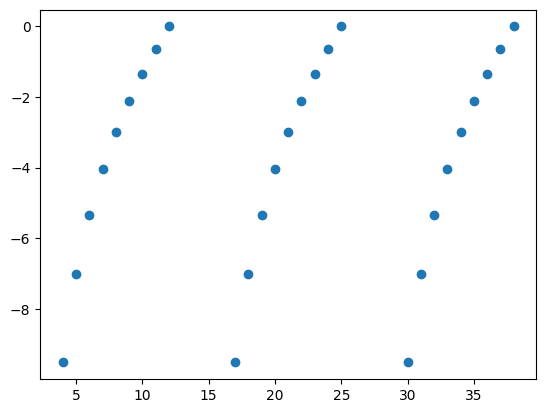

In [41]:
flg, ax = plt.subplots()
ax.scatter(list(range(0,len(scores))),scores)
plt.show()

In [29]:
hand_score([0,13],2)

/tmp/ipykernel_42716/683528434.py:6: RuntimeWarning: divide by zero encountered in log10
  prob = np.log10(prob * hand_strength(hand_index,nplayer))


-inf

In [37]:
hand_score([0,13],2)

/tmp/ipykernel_42716/683528434.py:6: RuntimeWarning: divide by zero encountered in log10
  prob = np.log10(prob * hand_strength(hand_index,nplayer))


-inf

In [36]:
to_hand([0,13])

['2h', '2d']

In [9]:
data = []
progress = 0
switch = 0
player_range = [6]
nsim = 10000
for n in player_range:
    sim = []
    for s in range(0,nsim):
        game = poker(n,0,0,"True")
        sim.append(game)
        
        if game[0][0] == float('-inf') and switch == 0:
            switch = 1
        
        progress += 1
        if switch == 1:
            print(progress / (nsim * len(player_range))  * 100, end='\r')
    data.append(sim)

/tmp/ipykernel_183968/683528434.py:6: RuntimeWarning: divide by zero encountered in log10
  prob = np.log10(prob * hand_strength(hand_index,nplayer))


In [150]:
max([1,2])

2

In [36]:
data = []
progress = 0
switch = 0
nsim = 1000
data2 = []
for s in range(0,nsim):
    game = poker(5,0,0,"e_rel[0] >= -2.87")
    data2.append(game)
    
    if game[0][0] == float('-inf') and switch == 0:
            switch = 1
        
    progress += 1
    if switch == 1:
        print(progress / (nsim * len(player_range))  * 100, end='\r')

/tmp/ipykernel_183968/683528434.py:6: RuntimeWarning: divide by zero encountered in log10
  prob = np.log10(prob * hand_strength(hand_index,nplayer))


In [40]:
flop_scores = []
deal_scores = []
for d in data2:
    if d[4] == "y":
        flop_scores.append(d[2])
    else:
        deal_scores.append(d[2])
flop_scores = np.array(flop_scores)
deal_scores = np.array(deal_scores)

In [41]:
print(len(flop_scores[flop_scores == 1]) / len(flop_scores))
print(len(flop_scores)/1000)

0.32222222222222224
0.18


In [29]:
hand_score([11,12],6)

-2.8604393234589134

In [222]:
win = 66
n = 100
comb(n,win)*(2/3)**win*(1/3)**(n-win)

0.08314173881692336

In [10]:
winning_scores = []
losing_scores = []
for d in data[0]:
    if d[2] == 1:
        winning_scores.append(d[0][0])
    else:
        losing_scores.append(d[0][0])
winning_scores = np.array(winning_scores)
losing_scores = np.array(losing_scores)

winning_scores[winning_scores == float('-inf')] = np.amin(winning_scores[winning_scores != float('-inf')]) - 1
losing_scores[losing_scores == float('-inf')] = np.amin(losing_scores[losing_scores != float('-inf')]) - 1

In [11]:
wlen = len(winning_scores)
llen = len(losing_scores)
print("Number Of Players:",data[0][0][3])
print()
print("WIN DATA")
print("Average:",np.average(winning_scores))
print("Meidan",np.median(winning_scores))
print(mode(winning_scores))
print("Wins:",wlen)
print("Mode Composition:",mode(winning_scores)[1][0]/wlen)
print()
print("LOSS DATA")
print("Average:",np.average(losing_scores))
print("Median:",np.median(losing_scores))
print(mode(losing_scores))
print("Loses:",llen)
print("Mode Composition:",mode(losing_scores)[1][0]/llen)

Number Of Players: 6

WIN DATA
Average: -10.399312377527641
Meidan -7.049357658524386
ModeResult(mode=array([-2.86658253]), count=array([125]))
Wins: 1857
Mode Composition: 0.06731287022078622

LOSS DATA
Average: -13.988407303316214
Median: -9.497899592123673
ModeResult(mode=array([-2.86658253]), count=array([418]))
Loses: 8143
Mode Composition: 0.051332432764337466


Equilibrium Scores: [-1.50442826]


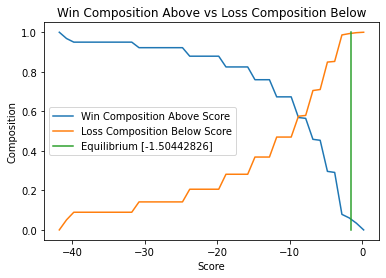

In [12]:
domain = np.arange(np.amin(losing_scores),1,1)
perca = np.array(list(map(lambda s: len(winning_scores[winning_scores >= s]) / len(winning_scores),domain )))
percb = np.array(list(map(lambda s: len(losing_scores[losing_scores < s]) / len(losing_scores), domain)))
percc = np.array(list(map(lambda s: len(losing_scores[losing_scores >= s]) / len(losing_scores), domain)))

bf1 = np.polyfit(domain,perca,3)
bf2 = np.polyfit(domain,percc,3)
bf = bf1 * wlen - bf2 * llen
x = np.roots(bf)
x = np.real(x[np.imag(x) == 0])
#x = x[x >= np.amin(losing_scores)]
#x = x[x <= 0]
print("Equilibrium Scores:",x)

flg, ax = plt.subplots()
ax.plot(domain,perca,label="Win Composition Above Score")
ax.plot(domain,percb,label="Loss Composition Below Score")
ax.plot([x,x],[0,1],label="Equilibrium " + np.array2string(x))
ax.set_xlabel("Score")
ax.set_ylabel("Composition")
ax.set_title("Win Composition Above vs Loss Composition Below")
ax.legend()
#plt.savefig("3pline.png")
plt.show()

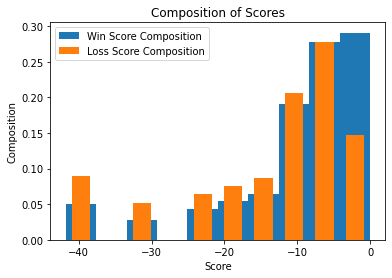

In [13]:
flg, ax = plt.subplots()
ax.hist(winning_scores,weights=np.ones(len(winning_scores)) / len(winning_scores),label="Win Score Composition")
ax.hist(losing_scores,weights=np.ones(len(losing_scores)) / len(losing_scores),label="Loss Score Composition",rwidth = .6)
ax.set_xlabel("Score")
ax.set_ylabel("Composition")
ax.set_title("Composition of Scores")
ax.legend()
#plt.savefig("3phist.png")
plt.show()

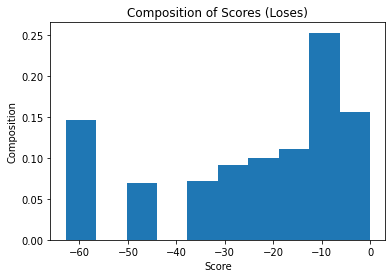

In [205]:
flg, ax = plt.subplots()

ax.set_xlabel("Score")
ax.set_ylabel("Composition")
ax.set_title("Composition of Scores (Loses)")
plt.show()

In [33]:
for i in range(0,52):
    for j in range(0,52):
        if j != i:
            hand_score([i,j2],8)

-107.8276798639541

In [103]:
pair_on_flop([11,38],8) * hand_strength([11,38],8)

4.100118722579053e-06

In [110]:
tok_on_flop([11,12],8)

0.04279042773446104

In [66]:
val = 1
n = 8
for j in range(1,8):
    val_temp = 0
    for i in range(1,5):
        val_temp = val_temp + (52 - n - 4 - j + i) / (52 - n - j) * comb(4,i) * comb(48,n + j - i) / comb(52, n + j)
    
    val = val * val_temp
print(val)

0.03161331535428703


0.0

In [62]:
def win_hh(hand_index,nplayer):
    
    rank = mdeck_rank[hand_index]
    h_card = np.max(rank)
    l_card = np.min(rank)
    
    if h_card > l_card:
        prob_min_given_only = comb(4 * l_card,3) / comb(52 - 2*nplayer,3)

        num_high_card = comb(4*h_card -1, 2)
        num_pair = 6 * h_card
        num_low_kicker = 8* l_card
        prob_none_dealt = comb(num_high_card-num_pair+num_low_kicker,2*nplayer) / comb(52,2*nplayer)

        prob_hh_win = prob_min_given_only * prob_none_dealt * hand_strength(hand_index,nplayer)
        
        return(prob_hh_win)
    else:
        return(1)

In [29]:
def win_prob_flop(hand_index,nplayer):
    rank = mdeck_rank[hand_index]
    h_card = np.amax(rank)
    l_card = np.amin(rank)
    prob_h_card = comb(4*h_card-1,2*nplayer-2)/comb(50,2*nplayer-2)
    prob_h_card2 = comb(4*h_card,2*nplayer-2)/comb(50,2*nplayer-2)
    
    if h_card > l_card:
        hh = prob_h_card + prob_h_card2
        # over count
    else:
        hh = 1.0
    
    pair_flop = 0
    if h_card > l_card:
        for i in range(1,4):
            pair_flop = pair_flop + (4-i) * comb(52 - 2*nplayer - 4 +i,2) \
            * comb(4,i) * comb(48,2*nplayer-i) / comb(52 - 2*nplayer,3) / comb(52,2*nplayer)

        op = hh * pair_flop
        # need to adjust for bayes rule
    else:
        
        op = prob_h_card2
        # needs sdjustment
        # count total number of pairs
    
    tp_flop = 0
    
    if h_card > l_card:
        for i in range(1,4):
            for j in range(1,4):
                tp_flop = tp_flop + (4-i) * (4-j) * (52 - 2*nplayer - 8 + i + j) / comb(52 - 2*nplayer,3) * comb(4,i)*comb(4,j) *comb(44,2*nplayer-i-j)/comb(52,2*nplayer)
    else:
        for i in range(0,3):
            tp_flop = tp_flop + comb(4-i,2)*comb(52-2*nplayer-4+i,1) / comb(52-2*nplayer,3) * comb(4,i) * comb(48,2*nplayer-i) / comb(52,2*nplayer)
        tp_flop = tp_flop * 12
    
    tp = prob_h_card2 * tp_flop
    
    tok_flop = 0 
    if h_card > l_card:
        for i in range(1,2):
            tok_flop = tok_flop + comb(4-i,2) * (52 - 2*nplayer - 4 +i) \
            * comb(4,i) * comb(48,2*nplayer-i) / comb(52 - 2*nplayer,3) / comb(52,2*nplayer)

        tok = hh * tok_flop
        # overcount
    else:
        for i in range(2,4):
            tok_flop = tok_flop + comb(4-i,1) * comb(52 - 2*nplayer - 4 +i,2) \
            * comb(4,i) * comb(48,2*nplayer-i) / comb(52 - 2*nplayer,3) / comb(52,2*nplayer)
            
        tok = prob_h_card2 * tok_flop
    
    s_flop = 0
    if abs(h_card-l_card)-1 <= 3 and abs(h_card-l_card) > 0:
        for i in range(1,4):
            for j in range(1,4):
                for k in range(1,4):
                    s_flop = s_flop + (4-i)*(4-j)*(4-k)/comb(52-2*nplayer,3) * comb(4,i) * comb(4,j) * comb(4,k) * comb(40,2*nplayer-i-j-k)/comb(52,2*nplayer)
    else:
        s_flop = 0
    
    s = prob_h_card * s_flop
    
    f_flop = 0
    if all(np.array(hand_index) <= 12) or (all(np.array(hand_index) > 12) and all(np.array(hand_index) <= 25))\
    or (all(np.array(hand_index) > 25) and all(np.array(hand_index) <= 38)) or (all(np.array(hand_index) > 38) and all(np.array(hand_index) <= 51)):
        
        for i in range(2,11):
            f_flop = f_flop + comb(13-i,3)/comb(52-2*nplayer,3) * comb(13,i) * comb(39,2*nplayer-i)/comb(52,2*nplayer)
    else:
        f_flop = 0
    
    f = prob_h_card * f_flop
    
    if h_card > l_card:
        
        fh_flop = tok_flop * pair_flop
    else:
        fh_flop = 0
        for i in range(0,2):
            fh_flop = fh_flop + comb(4-i,3)/comb(52-2*nplayer,3) * comb(4,i) * comb(48,2*nplayer-i)/comb(52,2*nplayer)
        fh_flop = fh_flop * 12
    
    fh = prob_h_card * fh_flop
    
    if h_card > l_card:
        fok = 1/comb(52-2*nplayer,3) * 4 * comb(48,2*nplayer-1)/comb(52,2*nplayer) * hh
    else:
        fok = (52-2*nplayer -2) / comb(52-2*nplayer,3) * comb(4,2) * comb(48,2*nplayer-i)/comb(52,2*nplayer) * prob_h_card2
    
    sf = s_flop * f_flop * prob_h_card
    # dependent. count cases instead
        
    return([hh,op,tp,tok,s,f,fh,fok,sf])
    